# LogisticRegression Model-LoanDataset

#### Type-Supervised Machine Learning Algoritham(Classification)

### 1.Problem Statement

### 2.Data Gathering
#### Importing Necessary Libraries


In [29]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import recall_score,f1_score,precision_score
import warnings
warnings.filterwarnings("ignore")

import pickle
import json

In [5]:
df = pd.read_csv("loan_data.csv")
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


### 3.Exploratory Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [7]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [8]:
df.index

RangeIndex(start=0, stop=9578, step=1)

In [10]:
df.shape

(9578, 14)

In [11]:
row_count=df.shape[0]
print("Row count-->",row_count)

Row count--> 9578


In [12]:
col_count=df.shape[1]
print("Row count-->",col_count)

Row count--> 14


In [13]:
#dependent variable
df["not.fully.paid"].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

<AxesSubplot:xlabel='not.fully.paid', ylabel='count'>

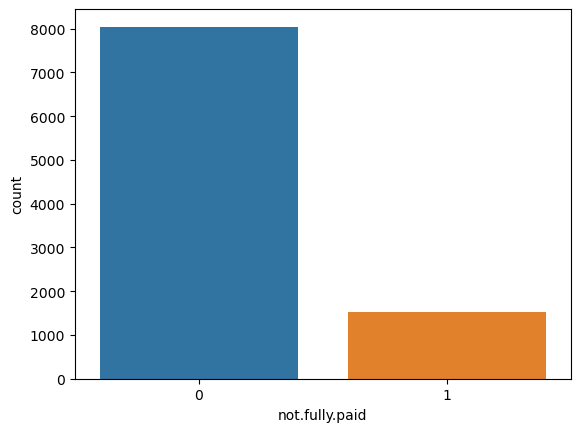

In [14]:
#visualizing Target column using graph
sns.countplot(x=df["not.fully.paid"])

### 4.Feature Engineering

In [15]:
df.columns = df.columns.str.replace(".","_")
df.columns


Index(['credit_policy', 'purpose', 'int_rate', 'installment', 'log_annual_inc',
       'dti', 'fico', 'days_with_cr_line', 'revol_bal', 'revol_util',
       'inq_last_6mths', 'delinq_2yrs', 'pub_rec', 'not_fully_paid'],
      dtype='object')

In [16]:
#coulmn containing objet datatype
df["purpose"].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

##### Encoding:Categorical cloumn to numeric value

In [17]:

df =pd.get_dummies(df,columns = ["purpose"])
df

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,0,1,0,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit_policy               9578 non-null   int64  
 1   int_rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log_annual_inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days_with_cr_line           9578 non-null   float64
 7   revol_bal                   9578 non-null   int64  
 8   revol_util                  9578 non-null   float64
 9   inq_last_6mths              9578 non-null   int64  
 10  delinq_2yrs                 9578 non-null   int64  
 11  pub_rec                     9578 non-null   int64  
 12  not_fully_paid              9578 non-null   int64  
 13  purpose_all_other           9578 

### 5.Model Building

In [19]:
x = df.drop("not_fully_paid",axis=1)
y = df["not_fully_paid"]

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=1,stratify=y)

In [21]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train,y_train)

LogisticRegression()

### 6.Model Evaluation

##### Testing dataset

In [27]:
y_pred_test=logistic_model.predict(x_test)

Accuracy=accuracy_score(y_test,y_pred_test)
print("Accuracy is --->",Accuracy)

confusion_matrix=confusion_matrix(y_test,y_pred_test)
print("Confusion matrix is --->\n",confusion_matrix)

class_report=classification_report(y_test,y_pred_test)
print("Classification Report is --->\n",class_report)

Accuracy is ---> 0.8382045929018789
Confusion matrix is --->
 [[1605    4]
 [ 306    1]]
Classification Report is --->
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      1609
           1       0.20      0.00      0.01       307

    accuracy                           0.84      1916
   macro avg       0.52      0.50      0.46      1916
weighted avg       0.74      0.84      0.77      1916



##### On Training Dataset

In [30]:
y_pred_train=logistic_model.predict(x_train)

accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy is --->",accuracy)

confusin_matrix = confusion_matrix(y_train,y_pred_train)
print("COnfusion matrix is --->\n",confusin_matrix)

class_report  = classification_report(y_train,y_pred_train)
print("Classification Report is --->\n",class_report)


Accuracy is ---> 0.8402505873140172
COnfusion matrix is --->
 [[6425   11]
 [1213   13]]
Classification Report is --->
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      6436
           1       0.54      0.01      0.02      1226

    accuracy                           0.84      7662
   macro avg       0.69      0.50      0.47      7662
weighted avg       0.79      0.84      0.77      7662



### Visualization Of Confusion Matrix

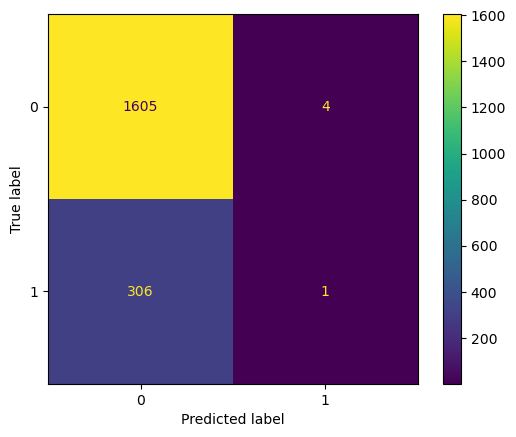

In [31]:
#for testing data
plot_confusion_matrix(logistic_model,x_test,y_test)


### AUC - ROC curve

#### #For Training Dataset

In [32]:
y_predict_probability_train = logistic_model.predict_proba(x_train)
y_predict_probability_train

array([[0.760562  , 0.239438  ],
       [0.9257121 , 0.0742879 ],
       [0.82971992, 0.17028008],
       ...,
       [0.7887946 , 0.2112054 ],
       [0.92699478, 0.07300522],
       [0.74707252, 0.25292748]])

In [35]:
fpr,tpr,thresh = roc_curve(y_train,y_predict_probability_train[:,1])

### Visualizing AUC-ROC curve

Text(0.5, 1.0, 'Reciever Operating Characteristics Curve')

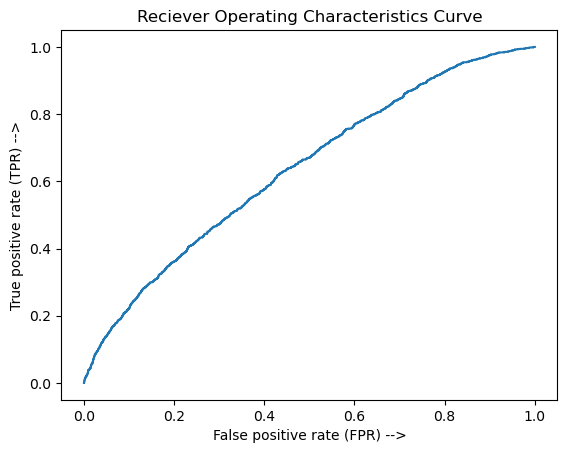

In [36]:
plt.plot(fpr, tpr)

plt.xlabel("False positive rate (FPR) -->")
plt.ylabel("True positive rate (TPR) -->")
plt.title("Reciever Operating Characteristics Curve")

In [37]:
auc_value = auc(fpr,tpr)
auc_value

0.6364025206906097

### Threshold value for testing data

In [38]:
threshold = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

df1 = pd.DataFrame()

for i in  threshold:
    preds = (logistic_model.predict_proba(x_test)[:,1] > i)

    df2 = pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds), 
                             precision_score(y_test, preds), f1_score(y_test, preds)],
                index=["Accuracy", "recall", "Precision", "F1-Score"])
    
    df1 = pd.concat([df1,df2], axis = 1)
    
df1.columns = threshold
df1

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
Accuracy,0.160230,0.282359,0.735908,0.827766,0.837161,0.838205,0.838727,0.838727,0.83977,0.83977,0.83977
recall,1.000000,0.944625,0.312704,0.045603,0.009772,0.003257,0.000000,0.000000,0.00000,0.00000,0.00000
Precision,0.160230,0.175971,0.245524,0.274510,0.272727,0.200000,0.000000,0.000000,0.00000,0.00000,0.00000
F1-Score,0.276203,0.296675,0.275072,0.078212,0.018868,0.006410,0.000000,0.000000,0.00000,0.00000,0.00000


### Threshold value for training data

In [39]:
threshold = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

df1 = pd.DataFrame()

for i in  threshold:
    preds = (logistic_model.predict_proba(x_train)[:,1] > i)

    df2 = pd.DataFrame(data=[accuracy_score(y_train, preds), recall_score(y_train, preds), 
                             precision_score(y_train, preds), f1_score(y_train, preds)],
                index=["Accuracy", "recall", "Precision", "F1-Score"])
    
    df1 = pd.concat([df1,df2], axis = 1)
    
df1.columns = threshold
df1

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
Accuracy,0.160010,0.301227,0.745758,0.833203,0.838684,0.840251,0.839990,0.839729,0.839990,0.840120,0.83999
recall,1.000000,0.938825,0.330343,0.080750,0.022023,0.010604,0.004894,0.002447,0.001631,0.000816,0.00000
Precision,0.160010,0.179005,0.264360,0.396000,0.421875,0.541667,0.500000,0.375000,0.500000,1.000000,0.00000
F1-Score,0.275878,0.300679,0.293691,0.134146,0.041860,0.020800,0.009693,0.004862,0.003252,0.001630,0.00000


### Creating Pickle File

In [40]:
with open("loanmodel.pkl","wb") as p:
    pickle.dump(logistic_model,p)

### Creating JSON File

In [41]:
columns = x.columns
columns

Index(['credit_policy', 'int_rate', 'installment', 'log_annual_inc', 'dti',
       'fico', 'days_with_cr_line', 'revol_bal', 'revol_util',
       'inq_last_6mths', 'delinq_2yrs', 'pub_rec', 'purpose_all_other',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_small_business'],
      dtype='object')

In [42]:
json_data = {"columns":list(columns)}
json_data

{'columns': ['credit_policy',
  'int_rate',
  'installment',
  'log_annual_inc',
  'dti',
  'fico',
  'days_with_cr_line',
  'revol_bal',
  'revol_util',
  'inq_last_6mths',
  'delinq_2yrs',
  'pub_rec',
  'purpose_all_other',
  'purpose_credit_card',
  'purpose_debt_consolidation',
  'purpose_educational',
  'purpose_home_improvement',
  'purpose_major_purchase',
  'purpose_small_business']}

In [43]:
with open("loanjson_data.json","w") as j:
    json.dump(json_data,j)

### Single User Input Testing

In [44]:
df.iloc[1]

credit_policy                     1.000000
int_rate                          0.107100
installment                     228.220000
log_annual_inc                   11.082143
dti                              14.290000
fico                            707.000000
days_with_cr_line              2760.000000
revol_bal                     33623.000000
revol_util                       76.700000
inq_last_6mths                    0.000000
delinq_2yrs                       0.000000
pub_rec                           0.000000
not_fully_paid                    0.000000
purpose_all_other                 0.000000
purpose_credit_card               1.000000
purpose_debt_consolidation        0.000000
purpose_educational               0.000000
purpose_home_improvement          0.000000
purpose_major_purchase            0.000000
purpose_small_business            0.000000
Name: 1, dtype: float64

In [45]:
credit_policy                    = 1.000000
int_rate                         = 0.107100
installment                      = 228.220000
log_annual_inc                   = 1.082143
dti                              = 14.290000
fico                             = 707.000000
days_with_cr_line                = 2760.000000
revol_bal                        = 33623.000000
revol_util                       = 76.700000
inq_last_6mths                   = 0.000000
delinq_2yrs                      = 0.000000
pub_rec                          = 0.000000
purpose_type                    = "purpose_" + "credit_card"
purpose_index = list(json_data["columns"]).index(purpose_type)

In [46]:
test_array = np.zeros(len(json_data["columns"]))
test_array[0] = credit_policy
test_array[1] = int_rate
test_array[2] = installment
test_array[3] = log_annual_inc
test_array[4] = dti
test_array[5] = fico
test_array[6] = days_with_cr_line
test_array[7] = revol_bal
test_array[8] = revol_util
test_array[9] = inq_last_6mths
test_array[10] = delinq_2yrs
test_array[11] = pub_rec
test_array[purpose_index] = 1
test_array

array([1.000000e+00, 1.071000e-01, 2.282200e+02, 1.082143e+00,
       1.429000e+01, 7.070000e+02, 2.760000e+03, 3.362300e+04,
       7.670000e+01, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00])

In [47]:
credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,
inq_last_6mths,delinq_2yrs,pub_rec,purpose_index

(0.0, 0.0, 0.0, 13)

In [51]:
prediction = logistic_model.predict([test_array])[0]
if prediction == 0:
    print("User Paid Complete Loan on Given Time")
    
else:
    print("User does not Paid Complete Loan")

User Paid Complete Loan on Given Time
